Inspired from the colabs defined in the Udacity course:-


Udacity course:-   **Introduction to Deep Learning with Tensorflow**

(1) https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l09c01_nlp_turn_words_into_tokens.ipynb



(2)  https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l09c02_nlp_padding.ipynb




(3)  https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l09c03_nlp_prepare_larger_text_corpus.ipynb


(4)  https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l09c04_nlp_embeddings_and_sentiment.ipynb




(5)  https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l09c05_nlp_tweaking_the_model.ipynb




(6)   https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l09c06_nlp_subwords.ipynb

### Tokenizing Words and Create Sequences

In [ ]:
### Python imports


from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
### Write some sentences
sentences = [
    'My favorite food is ice cream',
    'do you like ice cream too?',
    'My dog likes ice cream!',
    "your favorite flavor of icecream is chocolate",
    "chocolate isn't good for dogs",
    "your dog, your cat, and your parrot prefer broccoli"
]

In [ ]:
tokenizer = Tokenizer(num_words=1000, oov_token='<OOV>')

num_words = Maximum number of words to tokenizer


The words which are not available in the datasets will not be included in the tokenizer. So, in order to include those, we have set OOV (out of vocab) parameters.

In [ ]:
tokenizer.fit_on_texts(sentences)

In [ ]:
### View the word index

tokenizer.word_index

{'<OOV>': 1,
 'and': 24,
 'broccoli': 27,
 'cat': 23,
 'chocolate': 9,
 'cream': 4,
 'do': 11,
 'dog': 8,
 'dogs': 22,
 'favorite': 6,
 'flavor': 16,
 'food': 10,
 'for': 21,
 'good': 20,
 'ice': 3,
 'icecream': 18,
 'is': 7,
 "isn't": 19,
 'like': 13,
 'likes': 15,
 'my': 5,
 'of': 17,
 'parrot': 25,
 'prefer': 26,
 'too': 14,
 'you': 12,
 'your': 2}

In [ ]:
## Create the proper sequences of the word

sequences = tokenizer.texts_to_sequences(sentences)
print(sequences)

[[5, 6, 10, 7, 3, 4], [11, 12, 13, 3, 4, 14], [5, 8, 15, 3, 4], [2, 6, 16, 17, 18, 7, 9], [9, 19, 20, 21, 22], [2, 8, 2, 23, 24, 2, 25, 26, 27]]


In [ ]:
## Now create the new sentences
sentences2 = ["I like hot chocolate", "My dogs and my hedgehog like kibble but my squirrel prefers grapes and my chickens like ice cream, preferably vanilla"]


In [ ]:
sequences2 = tokenizer.texts_to_sequences(sentences2)

In [ ]:
sequences2

[[1, 13, 1, 9],
 [5, 22, 24, 5, 1, 13, 1, 1, 5, 1, 1, 1, 24, 5, 1, 13, 3, 4, 1, 1]]

### Padding with words

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
print(sentences)

['My favorite food is ice cream', 'do you like ice cream too?', 'My dog likes ice cream!', 'your favorite flavor of icecream is chocolate', "chocolate isn't good for dogs", 'your dog, your cat, and your parrot prefer broccoli']


In [ ]:
print(sequences)

[[5, 6, 10, 7, 3, 4], [11, 12, 13, 3, 4, 14], [5, 8, 15, 3, 4], [2, 6, 16, 17, 18, 7, 9], [9, 19, 20, 21, 22], [2, 8, 2, 23, 24, 2, 25, 26, 27]]


In [ ]:
padded = pad_sequences(sequences)

In [ ]:
padded

array([[ 0,  0,  0,  5,  6, 10,  7,  3,  4],
       [ 0,  0,  0, 11, 12, 13,  3,  4, 14],
       [ 0,  0,  0,  0,  5,  8, 15,  3,  4],
       [ 0,  0,  2,  6, 16, 17, 18,  7,  9],
       [ 0,  0,  0,  0,  9, 19, 20, 21, 22],
       [ 2,  8,  2, 23, 24,  2, 25, 26, 27]], dtype=int32)

In [ ]:
# put padding at the end
padded_end = pad_sequences(sequences, padding='post')

In [ ]:
padded_end

array([[ 5,  6, 10,  7,  3,  4,  0,  0,  0],
       [11, 12, 13,  3,  4, 14,  0,  0,  0],
       [ 5,  8, 15,  3,  4,  0,  0,  0,  0],
       [ 2,  6, 16, 17, 18,  7,  9,  0,  0],
       [ 9, 19, 20, 21, 22,  0,  0,  0,  0],
       [ 2,  8,  2, 23, 24,  2, 25, 26, 27]], dtype=int32)

### Get the words from Public Datasets

In [ ]:
 ## Amazon and Yelp reviews
 from tensorflow.keras.preprocessing.text import Tokenizer
 from tensorflow.keras.preprocessing.sequence import pad_sequences
 import tensorflow as tf

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
## load the dataset
dataset = tf.keras.utils.get_file('reviews.csv', 
                               'https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P')

131072/127831 [==============================] - 0s 0us/step


In [ ]:
print(dataset)

/root/.keras/datasets/reviews.csv


In [ ]:
# load the csv file
df = pd.read_csv(dataset)
df.head()

,Unnamed: 0,text,sentiment
0,0,So there is no way for me to plug it in here i...,0
1,1,Good case Excellent value.,1
2,2,Great for the jawbone.,1
3,3,Tied to charger for conversations lasting more...,0
4,4,The mic is great.,1


In [ ]:
### So, we are dealing with the sentiment analysis, 0 is hte negative review and 1 is the positive review

In [ ]:
reviews = df['text'].tolist()

In [ ]:
print(len(reviews))

1992


In [ ]:
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(reviews)

In [ ]:
print(len(tokenizer.word_index))

3261


In [ ]:
seq = tokenizer.texts_to_sequences(reviews)


In [ ]:
print(len(seq))

1992


In [ ]:
pad = pad_sequences(seq, padding='post')

In [ ]:
print(len(pad))

1992


In [ ]:
print(pad[0])

[  28   59    8   56  142   13   61    7  269    6   15   46   15    2
  149  449    4   60  113    5 1429    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0]


In [ ]:
print(seq[0])

[28, 59, 8, 56, 142, 13, 61, 7, 269, 6, 15, 46, 15, 2, 149, 449, 4, 60, 113, 5, 1429]


### Word embedding and Sentiment

We will do the neural network training to do the predict sentiment.

In [ ]:
## Python imports

!wget --no-check-certificate \
    -O /tmp/sentiment.csv https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P

--2020-06-19 13:02:05--  https://drive.google.com/uc?id=13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P
Resolving drive.google.com (drive.google.com)... 173.194.217.138, 173.194.217.102, 173.194.217.113, ...
Connecting to drive.google.com (drive.google.com)|173.194.217.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/magd5eqn8n0c6lujcn134u74sr4ctmp1/1592571675000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P [following]
--2020-06-19 13:02:20--  https://doc-08-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/magd5eqn8n0c6lujcn134u74sr4ctmp1/1592571675000/11118900490791463723/*/13ySLC_ue6Umt9RJYSeM2t-V0kCv-4C-P
Resolving doc-08-ak-docs.googleusercontent.com (doc-08-ak-docs.googleusercontent.com)... 172.217.204.132, 2607:f8b0:400c:c15::84
Connecting to doc-08-ak-docs.googleusercontent.com (doc-08-ak-docs.googleusercontent.com)|1

In [ ]:
dataset = pd.read_csv('/tmp/sentiment.csv')

In [ ]:
dataset.head()

,Unnamed: 0,text,sentiment
0,0,So there is no way for me to plug it in here i...,0
1,1,Good case Excellent value.,1
2,2,Great for the jawbone.,1
3,3,Tied to charger for conversations lasting more...,0
4,4,The mic is great.,1


In [ ]:
sentences = dataset['text'].tolist()

In [ ]:
labels = dataset['sentiment'].tolist()

In [ ]:
## divide the training and testing data
training_size = int((len(sentences)) * 0.8)
print(training_size)

1593


In [ ]:
training_data = sentences[0:training_size]

In [ ]:
testing_data = sentences[training_size:]

In [ ]:
print(len(training_data), len(testing_data))

1593 399


In [ ]:
training_label = labels[0:training_size]
testing_label = labels[training_size:]

In [ ]:
print(len(training_label), len(testing_label))

1593 399


In [ ]:
training_label_final = np.array(training_label)
testing_label_final = np.array(testing_label)

### Tokenize the dataset

In [ ]:
vocab_size=1000
trunc_type='post'
padd_type='post'
embedding_dim = 16
max_length =100


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
tokenizer = Tokenizer(num_words=max_length,oov_token='<OOV>')

In [ ]:
tokenizer.fit_on_texts(training_data)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_data)
padded = pad_sequences(sequences, maxlen=max_length, padding=padd_type,truncating=trunc_type)

In [ ]:
print(len(padded))

1593


In [ ]:
testing_sequences = tokenizer.texts_to_sequences(testing_data)

In [ ]:
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padd_type, truncating=trunc_type)

In [ ]:
## Train the sequence
embedding_dim = 16
model = tf.keras.Sequential(
    [
     tf.keras.layers.Embedding(vocab_size,embedding_dim, input_length=max_length),
     tf.keras.layers.GlobalAveragePooling1D(),
     tf.keras.layers.Dense(6, activation='relu'),
     tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           16000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 102       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 16,109
Trainable params: 16,109
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epoch =30
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [ ]:
history = model.fit(padded
                    , training_label_final, epochs=30, validation_data=(testing_padded, testing_label_final))

Epoch 1/30
50/50 [==============================] - 0s 5ms/step - loss: 0.6934 - accuracy: 0.4884 - val_loss: 0.6940 - val_accuracy: 0.4110
Epoch 2/30
50/50 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5229 - val_loss: 0.6950 - val_accuracy: 0.4110
Epoch 3/30
50/50 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.5229 - val_loss: 0.6957 - val_accuracy: 0.4110
Epoch 4/30
50/50 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5229 - val_loss: 0.6958 - val_accuracy: 0.4110
Epoch 5/30
50/50 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.5229 - val_loss: 0.6965 - val_accuracy: 0.4135
Epoch 6/30
50/50 [==============================] - 0s 2ms/step - loss: 0.6901 - accuracy: 0.5254 - val_loss: 0.6959 - val_accuracy: 0.4185
Epoch 7/30
50/50 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.5474 - val_loss: 0.6914 - val_accuracy: 0.5088
Epoch 8/30
50/50 [==

In [ ]:
# accuracy is not so good, lets visualize it


import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

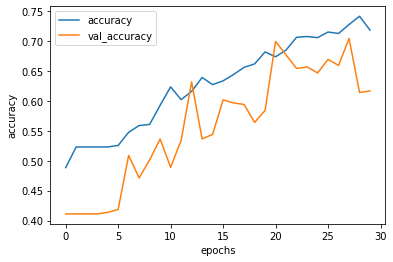

In [ ]:
plot_graphs(history,'accuracy')

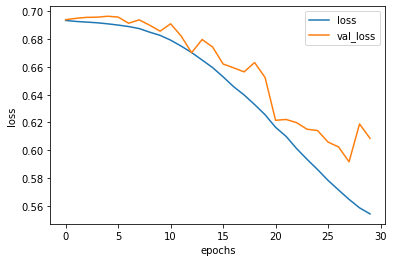

In [ ]:
plot_graphs(history,'loss')

In [ ]:
# this is the example of the overfitting where validation loss increases

In [ ]:
fake_reviews = ['I love this phone', 'I hate spaghetti', 
                'Everything was cold',
                'Everything was hot exactly as I wanted', 
                'Everything was green', 
                'the host seated us immediately',
                'they gave us free chocolate cake', 
                'not sure about the wilted flowers on the table',
                'only works when I stand on tippy toes', 
                'does not work when I stand on my head']

In [ ]:
sample_seq = tokenizer.texts_to_sequences(fake_reviews)

In [ ]:
sample_padd = pad_sequences(sample_seq,padding='post')

In [ ]:
sample_padd

array([[ 4, 88,  9, 15,  0,  0,  0,  0,  0],
       [ 4,  1,  1,  0,  0,  0,  0,  0,  0],
       [ 1, 10,  1,  0,  0,  0,  0,  0,  0],
       [ 1, 10,  1,  1, 32,  4,  1,  0,  0],
       [ 1, 10,  1,  0,  0,  0,  0,  0,  0],
       [ 2,  1,  1,  1,  1,  0,  0,  0,  0],
       [43,  1,  1,  1,  1,  1,  0,  0,  0],
       [14,  1,  1,  2,  1,  1, 21,  2,  1],
       [65, 48, 77,  4,  1, 21,  1,  1,  0],
       [ 1, 14, 79, 77,  4,  1, 21, 12,  1]], dtype=int32)

In [ ]:
classes = model.predict(sample_padd)

In [ ]:
for x in range(len(fake_reviews)):
    print(fake_reviews[x])
    print(classes[x])
    print('\n')

I love this phone
[0.98066014]


I hate spaghetti
[0.10879326]


Everything was cold
[0.10088009]


Everything was hot exactly as I wanted
[0.01084393]


Everything was green
[0.10088009]


the host seated us immediately
[0.06182706]


they gave us free chocolate cake
[0.0505031]


not sure about the wilted flowers on the table
[0.00048742]


only works when I stand on tippy toes
[0.5405068]


does not work when I stand on my head
[4.7257465e-05]




CLoser to 1, the more positive reviews

In [ ]:
more_review = ['not really like that watch', 'I want to gift this watch to my friend']
con_seq = tokenizer.texts_to_sequences(more_review)

In [ ]:
padd_Seq = pad_sequences(con_seq, padding='post')

In [ ]:
classes = model.predict(padd_Seq)

In [ ]:
for data in range(len(more_review)):
    print(more_review[data])
    print(classes[data])
    print('\n')

not really like that watch
[0.00539661]


I want to gift this watch to my friend
[0.02741472]




### More CLoser to 1, more positive review. and vice versa

In [ ]:
# let visualize the data

print(word_index)

{'<OOV>': 1, 'the': 2, 'and': 3, 'i': 4, 'it': 5, 'a': 6, 'is': 7, 'to': 8, 'this': 9, 'was': 10, 'of': 11, 'my': 12, 'for': 13, 'not': 14, 'phone': 15, 'in': 16, 'very': 17, 'with': 18, 'great': 19, 'good': 20, 'on': 21, 'that': 22, 'have': 23, 'you': 24, 'had': 25, 'so': 26, 'but': 27, 'are': 28, 'food': 29, 'service': 30, 'be': 31, 'as': 32, 'place': 33, 'all': 34, 'like': 35, 'quality': 36, 'time': 37, 'product': 38, 'one': 39, 'at': 40, 'we': 41, 'well': 42, 'they': 43, 'would': 44, 'back': 45, 'if': 46, 'headset': 47, 'works': 48, 'battery': 49, 'really': 50, "don't": 51, 'sound': 52, 'your': 53, 'use': 54, 'best': 55, 'up': 56, 'from': 57, 'has': 58, 'just': 59, 'an': 60, "i've": 61, 'will': 62, 'no': 63, 'were': 64, 'only': 65, 'also': 66, 'me': 67, 'there': 68, 'ever': 69, 'than': 70, "it's": 71, 'out': 72, 'nice': 73, 'ear': 74, 'go': 75, 'excellent': 76, 'when': 77, 'first': 78, 'work': 79, 'recommend': 80, '2': 81, 'here': 82, 'after': 83, "i'm": 84, 'or': 85, 'never': 86, 

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])


In [ ]:
reverse_word_index

{1: '<OOV>',
 2: 'the',
 3: 'and',
 4: 'i',
 5: 'it',
 6: 'a',
 7: 'is',
 8: 'to',
 9: 'this',
 10: 'was',
 11: 'of',
 12: 'my',
 13: 'for',
 14: 'not',
 15: 'phone',
 16: 'in',
 17: 'very',
 18: 'with',
 19: 'great',
 20: 'good',
 21: 'on',
 22: 'that',
 23: 'have',
 24: 'you',
 25: 'had',
 26: 'so',
 27: 'but',
 28: 'are',
 29: 'food',
 30: 'service',
 31: 'be',
 32: 'as',
 33: 'place',
 34: 'all',
 35: 'like',
 36: 'quality',
 37: 'time',
 38: 'product',
 39: 'one',
 40: 'at',
 41: 'we',
 42: 'well',
 43: 'they',
 44: 'would',
 45: 'back',
 46: 'if',
 47: 'headset',
 48: 'works',
 49: 'battery',
 50: 'really',
 51: "don't",
 52: 'sound',
 53: 'your',
 54: 'use',
 55: 'best',
 56: 'up',
 57: 'from',
 58: 'has',
 59: 'just',
 60: 'an',
 61: "i've",
 62: 'will',
 63: 'no',
 64: 'were',
 65: 'only',
 66: 'also',
 67: 'me',
 68: 'there',
 69: 'ever',
 70: 'than',
 71: "it's",
 72: 'out',
 73: 'nice',
 74: 'ear',
 75: 'go',
 76: 'excellent',
 77: 'when',
 78: 'first',
 79: 'work',
 80: 'r

In [ ]:
# take the embedding layers
e= model.layers[0]

In [ ]:
e


In [ ]:
weights = e.get_weights()[0]

In [ ]:
weights.shape

(1000, 16)

In [ ]:
import io

# let take vectos and metadata

out_v = io.open('vecs.tsv','w',encoding='utf-8')
out_m = io.open('meta.tsv','w',encoding='utf-8')

In [ ]:
for word_num in range(1,vocab_size):
    word = reverse_word_index[word_num]
    embedding = weights[word_num]
    out_m.write(word+'\n')
    out_v.write('\t'.join([str(x) for x in embedding]) +'\n')

In [ ]:
out_v.close()
out_m.close()

In [ ]:
from google.colab import files

In [ ]:
files.download('meta.tsv')

In [ ]:
files.download('vecs.tsv')

Upload the downloaded files into the website: http://projector.tensorflow.org/